# Práctica Guiada de Laboratorio 8 - Inteligencia Artificial G1 (EAPIS) 2022-1

### Prof. Rolando Alberto Maguiña Pérez

## Introducción

En esta Práctica Guiada de Laboratorio, a realizarse el Lunes 25 de Julio del presente, se resolverá el "Problema de la Propina", denominado así porque consiste en contruir un sistema de inferencia difusa (SID) que calcule la propina que deberíamos dar en un restaurante. 

Se pretende ilustrar la capacidad de la lógica difusa para generar un comportamiento complejo a partir de un conjunto compacto e intuitivo de reglas provenientes de un experto en el dominio.

## Objetivos

- Presentar los conceptos básicos de un sistema de inferencia difusa. 
- Construir un sistema de inferencia difusa (sistema experto basado en Lógica Difusa) para resolver el "Problema de la Propina".

## Fundamentos

### Lógica Difusa

La **Lógica Difusa** es una metodología que se basa en la idea de que la "veracidad" de una afirmación se puede expresar en un continuo. Esto quiere decir que una afirmación puede no ser *verdadero* o *falso*, sino *parcialmente verdadero* o *parcialmente falso*.

Una **variable difusa** tiene un **valor nítido** que toma algún número en un dominio predefinido (en términos de lógica difusa, llamado **universo** o **universo de discurso**). El valor nítido es cómo pensamos en la variable usando matemáticas normales. P.e., si una variable difusa fuera cuánto darle de propina a alguien, su universo sería del 0 al 25% y podría tomar un valor nítido del 15%.

Una variable difusa también tiene varios **términos** que se utilizan para describir la variable. Los términos tomados en conjunto son el **conjunto difuso** que se puede utilizar para describir el "valor difuso" de una variable difusa. Estos términos suelen ser adjetivos como "pobre", "mediocre" y "bueno". Cada término tiene una **función de pertenencia** que define cómo un valor nítido se relaciona con el término en una escala de 0 a 1. En esencia, describe "qué tan bueno" es algo. 

Por tanto, volviendo al ejemplo de la propina, una "buena propina" podría tener una función de membresía que tenga valores distintos de cero entre el 15% y el 25%, siendo el 25% una "propina completamente buena" (es decir, su membresía es 1.0) y 15% es una "propina apenas buena" (es decir, su pertenencia es 0.1).

Un **sistema de inferencia difuso** vincula variables difusas mediante un conjunto de **reglas**. Estas reglas son simplemente asociaciones que describen cómo una o más variables difusas se relacionan con otra. Dichas reglas se expresan en términos de una declaración SI-ENTONCES; la parte SI se llama **antecedente** y la parte ENTONCES es el **consecuente**. En el ejemplo de las propinas, una regla podría ser "SI el servicio fue bueno ENTONCES, la propina será buena". Los procedimientos matemáticos sobre cómo se usa una regla para calcular el valor del consecuente en función del valor del antecedente se tratarán en subsiguientes prácticas guiadas.

In [1]:
import numpy as np
import skfuzzy as fuzz

## El Problema de la Propina 

El "problema de la propina" es uno de los que se usa para ilustrar la capacidad de la lógica difusa para generar un comportamiento complejo a partir de un conjunto compacto e intuitivo de reglas provenientes de un experto en el dominio.

Vamos a construir un sistema de inferencia difusa que modele cómo determinar la cantidad de propina a dar en un restaurante, teniendo en cuenta el servicio y la calidad de la comida; ambos, valorados en una escala de 0 a 10. Este sistema se podría utilizar para dejar una propina de entre 0 y 25%.

### Diseño del sistema

Como sabemos, se requiere determinar mediante análisis las variables de entrada y de salida para el problema planteado. Para c/u de ellas se deberá determinar su universo de discurso (como se indica ut supra, cada variable difusa tiene un rango de valores nítidos al que se le denomina así), el particionamiento y el solapamiento entre las particiones. Como sabemos, a cada partición le corresponde un término linguístico.

Este problema podríamos estructurarlo o diseñarlo, de la sgte manera:

#### Variables de entrada (antecedentes)

Varias variables influyen en la decisión sobre cuánto dar de propina en un almuerzo o en una cena. 

Considere dos de ellas:

- **calidad**: Calidad de la comida
    - Universo: ¿Qué tan sabrosa fue la comida, en una escala del 1 al 10?
    - Términos linguísticos: mala, regular, excelente
- **servicio**: Calidad del servicio
    - Universo : ¿Qué tan bueno fue el servicio de los camarerosb, en una escala del 1 al 10?
    - Términos linguísticos: deficiente, aceptable, impresionante
        

#### Variable de salida (consecuente)

La variable de salida es simplemente el monto de la propina, en puntos porcentuales:

- **propina**: porcentaje de la factura para agregar como propina
    - Universo: ¿Cuánto deberíamos dar de propina, en una escala del 0% al 25%?
    - Términos linguísticos: baja, media, alta

#### Reglas difusas

- SI la *calidad de comida* fue mala O el *servicio* fue deficiente, ENTONCES la propina será baja
- SI el *servicio* fue aceptable, ENTONCES la propina será media.
- SI la *calidad de comida* fue excelente O el servicio fue impresionante, ENTONCES la propina será alta.

La mayor parte de la gente estaría de acuerdo con estas reglas, aunque se debe tener en cuenta que las reglas son difusas. Mapear las reglas imprecisas en una propina definida y procesable es un desafío. Este es el tipo de tarea en la que sobresale la lógica difusa. 

### Implementación en el scikit-fuzzy

Importamos antes la biblioteca de Python llamada Matplotlib, la cual nos ayudará en la obtención de los gráficos a presentar.

In [4]:
import matplotlib.pyplot as plt

#### Instalación del skfuzzy

La instalación de la biblioteca llamada scikit-fuzzy (o skfuzzy) contempla los sgtes pasos:
1. Abrir una terminal de Anaconda.
2. Ejecutar en la terminal: 
* $ conda install -c conda-forge/label/gcc7 scikit-fuzzy
3. Responder 'y' a la pregunta sobre la instalación de nuevos paquetes.

Alternativamente, se puede instalar mediante el sistema de gestión de paquetes llamado `pip`, con:
* $ pip install -U scikit-fuzzy

Las funciones de pertenencia de dichos términos se definen en scikit-fuzzy de la siguiente manera:

Generamos las variables con sus respectivos universos de universo:
* calidad (x_cal) y servicio (x_serv), ambas en el rango subjetivo [0, 10]
* propina (x_prop) tiene un rango de [0, 25] en unidades de puntos porcentuales.

In [7]:
x_calidad = np.arange(0, 11, 1)
x_servicio = np.arange(0, 11, 1)
x_propina = np.arange(0, 26, 1)

Ahora generamos las funciones de membresía asociadas a los términos linguísticos considerados para las variables. Tanto para las variables de entrada como para la de salida, se deberá generar tres funciones de pertenencia.

In [8]:
# Generate fuzzy membership functions
calidad_lo = fuzz.trimf(x_calidad, [0, 0, 5])
calidad_md = fuzz.trimf(x_calidad, [0, 5, 10])
calidad_hi = fuzz.trimf(x_calidad, [5, 10, 10])
servicio_lo = fuzz.trimf(x_servicio, [0, 0, 5])
servicio_md = fuzz.trimf(x_servicio, [0, 5, 10])
servicio_hi = fuzz.trimf(x_servicio, [5, 10, 10])
propina_lo = fuzz.trimf(x_propina, [0, 0, 13])
propina_md = fuzz.trimf(x_propina, [0, 13, 25])
propina_hi = fuzz.trimf(x_propina, [13, 25, 25])

Para visualizar los universos de discurso y las funciones de pertenencia, definidas para cada variable, usaremos funciones de la biblioteca de Python llamada Matplotlib

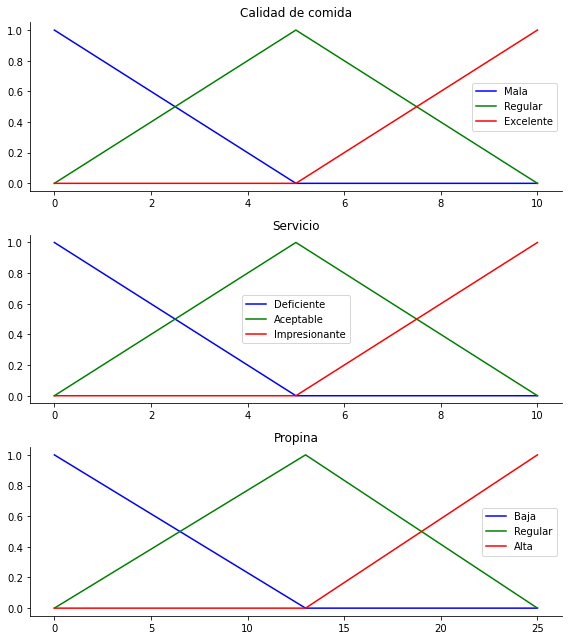

In [11]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_calidad, calidad_lo, 'b', linewidth=1.5, label='Mala')
ax0.plot(x_calidad, calidad_md, 'g', linewidth=1.5, label='Regular')
ax0.plot(x_calidad, calidad_hi, 'r', linewidth=1.5, label='Excelente')
ax0.set_title('Calidad de comida')
ax0.legend()

ax1.plot(x_servicio, servicio_lo, 'b', linewidth=1.5, label='Deficiente')
ax1.plot(x_servicio, servicio_md, 'g', linewidth=1.5, label='Aceptable')
ax1.plot(x_servicio, servicio_hi, 'r', linewidth=1.5, label='Impresionante')
ax1.set_title('Servicio')
ax1.legend()

ax2.plot(x_propina, propina_lo, 'b', linewidth=1.5, label='Baja')
ax2.plot(x_propina, propina_md, 'g', linewidth=1.5, label='Media')
ax2.plot(x_propina, propina_hi, 'r', linewidth=1.5, label='Alta')
ax2.set_title('Propina')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Pregunta

Suponiendo que en una cena en un restaurante (antes de la pandemia!) se evaluó:
- La *calidad de la comida* fue **6.5**
- El *servicio* fue **9,8**

¿Cuál sería la propina para esas circunstancias?

#### Borrosificación

Necesitamos obtener la activación de nuestras funciones de pertenencia con estos valores.
Los valores exactos 6.5 y 9.8 no existen en nuestros universos ...

Haremos uso del método denominado *fuzz.interp_membership*, el cual forma parte de la biblioteca *skfuzzy*.

In [40]:
# Primero para la variable 'Calidad de comida'
calidad_level_lo = fuzz.interp_membership(x_calidad, calidad_lo, 6.5)
calidad_level_md = fuzz.interp_membership(x_calidad, calidad_md, 6.5)
calidad_level_hi = fuzz.interp_membership(x_calidad, calidad_hi, 6.5)
print("Calidad mala: ", calidad_level_lo)
print("Calidad regular: ",calidad_level_md)
print("Calidad excelente: ", calidad_level_hi)

print("================================================")
# Ahora para la variable 'Servicio'
servicio_level_lo = fuzz.interp_membership(x_servicio, servicio_lo, 9.8)
servicio_level_md = fuzz.interp_membership(x_servicio, servicio_md, 9.8)
servicio_level_hi = fuzz.interp_membership(x_servicio, servicio_hi, 9.8)
print("Servicio deficiente: ", servicio_level_lo)
print("Servicio aceptable: ", servicio_level_md)
print("Servicio impresionante: ", servicio_level_hi)

Calidad mala:  0.0
Calidad regular:  0.7
Calidad excelente:  0.30000000000000004
Servicio deficiente:  0.0
Servicio aceptable:  0.03999999999999987
Servicio impresionante:  0.9600000000000002


#### Aplicación de reglas

Ahora tomamos nuestras reglas y las aplicamos. La regla 1 se refiere a una comida de mala calidad O a un mal servicio. 

El operador OR significa que tomamos el máximo de estos dos. De esta manera, obtenemos la activación (grados de cumplimiento) del antecedente (lado izquierdo) de la regla 1.

In [51]:
# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(calidad_level_lo, servicio_level_lo)
print(active_rule1)

0.0


Ahora aplicamos esto recortando la parte superior de la función de membresía de salida correspondiente con `np.fmin`

In [53]:
# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
propina_activation_lo = np.fmin(active_rule1, propina_lo)  # removed entirely to 0

Para la regla 2, relacionamos un servicio aceptable con una propina media.

In [56]:
# For rule 2 we connect acceptable service to medium tipping
propina_activation_md = np.fmin(servicio_level_md, propina_md)

Para la regla 3, relacionamos una comida excelente *O* un servicio impresionante con propinas altas

In [48]:
# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(calidad_level_hi, servicio_level_hi)
print(active_rule3)
propina_activation_hi = np.fmin(active_rule3, propina_hi)
prop0 = np.zeros_like(x_propina)

0.9600000000000002


A continuación, visualizaremos el resultado de dicho procesamiento:

Text(0.5, 1.0, 'Grados de posibilidad en la salida')

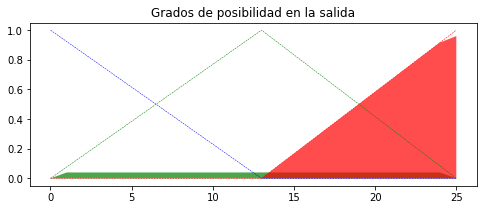

In [50]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_propina, prop0, propina_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_propina, propina_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_propina, prop0, propina_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_propina, propina_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, prop0, propina_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_propina, propina_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Grados de posibilidad en la salida')

#### Agregación de reglas

Habiendo determinado la *activación* (grados de posibilidad) de cada función de pertenencia de salida, deben combinarse todas ellas. Por lo general, esto se hace utilizando un operador máximo. Este paso también se conoce como *agregación*.

#### Defuzzificación (Desborrosificación)

Finalmente, para obtener una respuesta del mundo real, volvemos a la lógica nítida (proposicional) del mundo de las funciones de pertenencia difusas. Para los propósitos de este ejemplo, se utilizará el método del centroide (denominado también centro de áreas).

El resultado es una propina del 20.2%.

Agregando las tres funciones de membresía de salida:

In [55]:
# Aggregate all three output membership functions together
aggregated = np.fmax(propina_activation_lo,
                     np.fmax(propina_activation_md, propina_activation_hi))

Calculamos el valor difuminado valiéndonos de los métodos llamados *defuzz* y, otra vez, *fuzz.interp_membership*. Hay varios métodos de difuminación tales como: Centro de Máximos, Centro de Áreas, Media de Máximos, entre otros; para este problema usaremos el Centro de Áreas, el cual en la biblioteca skfuzzy se implementa con 'centroid'.

In [34]:
# Calculate defuzzified result
prop = fuzz.defuzz(x_propina, aggregated, 'centroid')
prop_activation = fuzz.interp_membership(x_propina, aggregated, prop)  # for plot

Para visualizar el resultado, hacemos:

Text(0.5, 1.0, 'Agregacion de membresia y resultado (linea negra)')

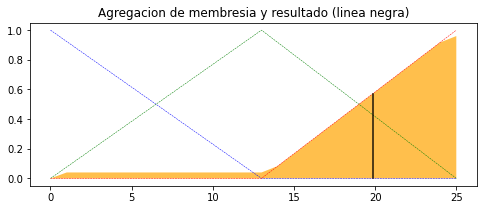

In [35]:
# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_propina, propina_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_propina, propina_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_propina, propina_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_propina, prop0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([prop, prop], [0, prop_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Agregacion de membresia y resultado (linea negra)')


## Conclusiones

El poder de los sistemas difusos radica en que permite un comportamiento intuitivo y complicado, basado en un sistema de reglas dispersas con una sobrecarga mínima. Notar que nuestros universos de funciones de membresía eran generales, definidos sólo con números enteros, pero `fuzz.interp_membership` permitió que la resolución efectiva aumentara según la demanda. Este sistema puede responder a cambios arbitrariamente pequeños en las entradas y la carga de procesamiento es mínima. 

## Ejercicios

### Ejercicio 1

- Ejercicio 1a. Modifique los parámetros de las funciones de pertenencia (parámetros de la función triangular, traslape, etc.) y observe el comportamiento del sistema. Mencione y analice los resultados.
- Ejercicio 1b. Agregue más reglas a la base de reglas. Mencione y analice los cambios en el comportamiento del sistema.
- Ejercicio 1c. Mejore la presentación del presente cuaderno computacional, tanto en la documentación de las funciones usadas (especialmente de Matplotlib y skfuzzy) como en los gráficos mostrados.

### Ejercicio 2

La resolución del "Problema de la propina" presentado en la primera parte, se ha efectuado usando las bibliotecas Numpy y skfuzzy de Python. En este ejercicio, se pide:
- Ejercicio 2a. Use la 'skfuzzy control system API' (API del sistema de inferencia difusa del skfuzzy) para modelizar este problema. Describa los pasos contemplados en la utilización de dicha API. En esta pregunta, se deberán replicar los resultados obtenidos en la resolución inicial.
- Ejercicio 2b. Agregue más reglas a la base de reglas. Mencione y analicer los cambios en el comportamiento del sistema.

Sugerencia: tomar como base y como información complementaria, respectivamente, la sgte :
- Tutorial del propio scikit-fuzzy [Fuzzy Control Systems: The Tipping Problem](https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html) 
- [API Reference](https://scikit-fuzzy.readthedocs.io/en/latest/api/api.html)

### Instrucciones para el envío de la solución

La solución de la "Práctica Guiada de Laboratorio 8 IA 2022-1" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Domingo 31 de Julio del 2022, en un archivo con extensión .ipynb. 

El documento deberá tener las sgtes características:
- Nombre del archivo: solPGL8_SI_EAPIS_2022-1_nombre-apellidos.ipynb.
- Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.